In [1]:
import point_source_library as psrclib
from skimage import data, feature, filters
import matplotlib.pyplot as plt
import gnfw_models 
import numpy as np
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy import units as u

In [2]:
import jax
jax.config.update('jax_enable_x64',True)
jax.config.update('jax_platform_name','cpu')

import jax.numpy as jnp

In [3]:
import gnfw_models

In [9]:
%matplotlib inline

In [ ]:
map_ps_cleaned = psrclib.subtract_src("moo1322")

In [5]:
dzline = np.linspace(0.00,5.00,1000)
daline = cosmo.angular_diameter_distance(dzline)/u.radian
nzline = cosmo.critical_density(dzline)
hzline = cosmo.H(dzline)/cosmo.H0

daline = daline.to(u.Mpc/u.arcsec)
nzline = nzline.to(u.Msun/u.Mpc**3)

dzline = jnp.array(dzline)
hzline = jnp.array(hzline.value)
nzline = jnp.array(nzline.value)
daline = jnp.array(daline.value)


In [6]:
#parameters:
radius_500 = 1 #1 mpc = 1000 kpc 
m_500=(4.*np.pi/3.)*radius_500**3/(500*nzline[80])
x0 = 0.0
y0 = 0.0
alpha=1.0510
beta=5.4905
gamma=0.3081
P0=8.403
c500=1.177

arcmin2_rads=(2./60.)*np.pi/180

p = [x0,y0,P0,c500,alpha,beta,gamma,m_500]


x=np.linspace(-1*arcmin2_rads,arcmin2_rads,1000)
y=np.linspace(-1*arcmin2_rads,arcmin2_rads,1000)

x_coords,y_coords = np.meshgrid(x,y)
z=0.4 #Romero et al 2015, Table 1

radius_core=1.
radius_ext= 0.3
m_500_core = (4.*np.pi/3.)*radius_core**3/(500*nzline[80])
m_500_ext = (4.*np.pi/3.)*radius_ext**3/(500*nzline[80])
p_core_ext = x0, y0, P0, c500, alpha, beta, gamma, m_500_core, m_500_ext


In [7]:
two_clusters=gnfw_models.bimodal_system(p,x_coords,y_coords,1.,separation=20)

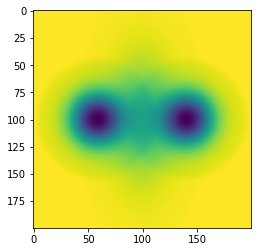

In [30]:
dog_20_30=filters.difference_of_gaussians(two_clusters,5,10)
plt.imshow(two_clusters[400:600,400:600])

In [19]:
core_ext = gnfw_models.maincore_plus_extension(p_core_ext,x_coords,y_coords,z,separation=20)

In [28]:
dog_20_30_ext=filters.difference_of_gaussians(core_ext,40,70)


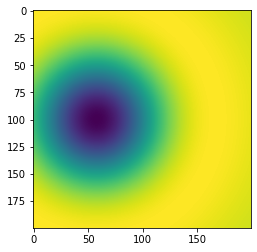

In [29]:
plt.imshow(dog_20_30_ext[400:600,400:600])

In [31]:
theta1=[5,10,15,20,25,30,35,40,45,50]

In [32]:
theta2=[5,10,15,20,25,30,35,40,45,50]

In [33]:
clusters_list=["moo0105","moo0135","moo1031","moo1046","moo1052","moo1054","moo1059","moo1108","moo1110","moo1203","moo1322","moo1329","moo1354"]

In [34]:
clean_maps_dict={}
for i in clusters_list:
    clean_map = psrclib.subtract_src(i)
    clean_maps_dict[i]=clean_map

In [51]:
dog_dict={}
for k in clean_maps_dict.keys():
    for i in theta1:
        for j in theta2:
            if i<j:
                dog_map = filters.difference_of_gaussians(clean_maps_dict[k],i,j)
                name = k + "theta1_"+str(i) + "__"+"theta2_"+str(j)
                dog_dict[name]=dog_map